In [ ]:
!pip install pymysql > /dev/null
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시시작

In [ ]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving mysql.json to mysql.json


In [ ]:
import json
with open(filename) as fp:
    config_str = fp.read()
config = json.loads(config_str)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [ ]:
import db_module as dm

In [ ]:

!ls -la

In [ ]:

import pymysql

def get_monthly(config):
    conn = pymysql.connect(**config)
    cur = conn.cursor()

    sql = """
        SELECT DATE_FORMAT(sdate, '%m') AS `month`, 
            SUM(revenue) AS revenue, SUM(profit) AS profit
            FROM sales_book
            GROUP BY `month`
            ORDER BY `month`;
    """
    cur.execute(sql)
    results = cur.fetchall()

    cur.close()
    conn.close()
    return results

# 1.월별매출/이익

In [ ]:
results = dm.get_monthly_data(config)
#results = get_monthly(config)
df = pd.DataFrame(results, columns=['월','매출','이익'])
df.set_index('월', inplace=True)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df

NameError: ignored

In [ ]:
tdf = df.T
tdf['계'] = [df.매출.sum(), df.이익.sum()]


In [ ]:
tdf

In [ ]:
df.plot.bar(figsize=(10,6))
plt.title('월별 매출/이익', size=15)
plt.grid()
plt.show()

# 2.거래처별 매출/이익

In [ ]:
import pymysql
def get_sales_company(config):
    conn = pymysql.connect(**config)
    cur = conn.cursor()

    sql = """
   SELECT scompany, SUM(revenue) AS com_revenue, 
   SUM(profit) AS  com_profit
   FROM sales_book
   group BY scompany;
    """
    cur.execute(sql)
    results = cur.fetchall()

    cur.close()
    conn.close()
    return results

In [ ]:
results = dm.get_sales_company(config)
#results = get_sales_company(config)
df = pd.DataFrame(results, columns=['거래처','매출','이익'])
df.set_index('거래처', inplace=True)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df['이익율'] = df.이익 / df.매출 * 100
df

,거래처,매출,이익
0,한경아카데미,14164600,1344430
1,표준협회,12047800,895500
2,테크브루,12503600,1226230
3,생산성본부,14959100,1349710
4,멀티캠퍼스,15759400,1444900


In [ ]:
df[['매출','이익']].plot.barh(rot=0, figsize=(10,4))
plt.title('거래처별 매출/이익', size=15)
plt.grid()
plt.show()

In [ ]:
results = dm.get_monthly_data(config)
#results = get_monthly(config)
df = pd.DataFrame(results, columns=['월','매출','이익'])
df.set_index('월', inplace=True)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df

NameError: ignored

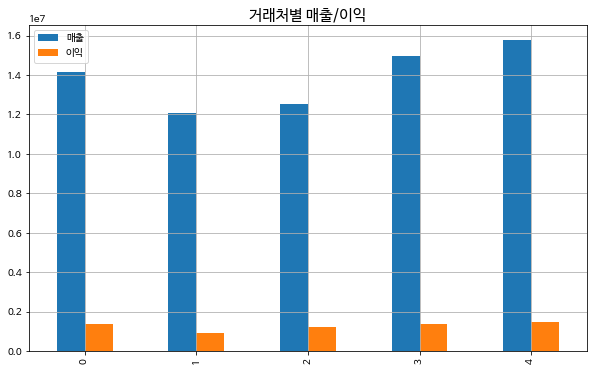

In [ ]:
df.plot.bar(figsize=(10,6))
plt.title('거래처별 매출/이익', size=15)
 
plt.grid()
plt.show()

#3. 거래처별 판매상품 및 수량

In [ ]:
def get_products_by_company(config):
    conn = pymysql.connect(**config)
    cur = conn.cursor()

    sql = """
        SELECT scompany, pname, SUM(sunit) AS unit
            FROM sales_book
            GROUP BY scompany, pname
            ORDER BY scompany;
    """
    cur.execute(sql)
    results = cur.fetchall()

    cur.close()
    conn.close()
    return results

In [ ]:
results = dm.get_products_by_company(config)
df = pd.DataFrame(results, columns=['판매처','상품','수량'])
df.set_index(['판매처','상품'], inplace=True)
df['수량'] = df.수량.astype(int)
df

In [ ]:
df.reset_index()['판매처'].unique()

In [ ]:
for company in df.reset_index()['판매처'].unique():
    sdf=df.loc[(company,)]
    sdf.sort_values(by='수량').plot.barh(figsize=(10,6))
    plt.title(f'{company}에 판매된 상품', size=15)
    plt.grid()
    plt.show()

#4. 카테고리별 매출 이익 

In [ ]:
import pymysql
def get_sales_category(config):
    conn = pymysql.connect(**config)
    cur = conn.cursor()

    sql = """
  SELECT  pcategory, sum(revenue) AS cat_rev, 
   SUM(profit) AS cat_pro
   FROM sales_book
   group BY  pcategory;
    """
    cur.execute(sql)
    results = cur.fetchall()

    cur.close()
    conn.close()
    return results

In [ ]:
#results = dm.get_sales_category(config)
results = get_sales_category(config)
df = pd.DataFrame(results, columns=['카테고리','매출','이익'])
df.set_index('카테고리', inplace=True)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df

,매출,이익
카테고리,,
캠핑용품,30089700,2927820
자동차용품,19186700,1681390
헬스용품,20158100,1651560


In [ ]:
results = dm.get_data_by_category(config)
df = pd.DataFrame(results, columns=['카테고리','매출','이익'])
df.set_index('카테고리', inplace=True)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df['이익율'] = df.이익 / df.매출 * 100
df

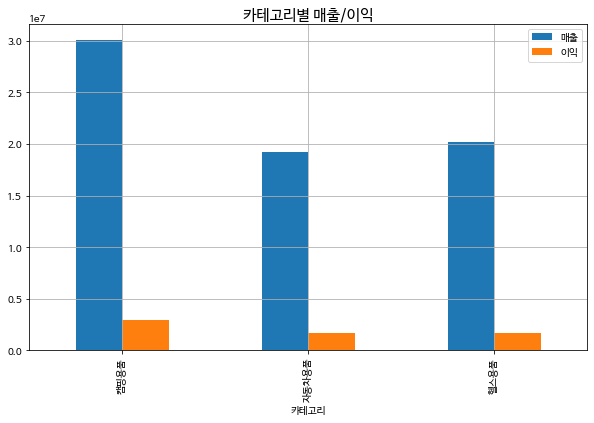

In [ ]:
df.plot.bar(figsize=(10,6))
plt.title('카테고리별 매출/이익', size=15)
plt.grid()
 
plt.legend()
plt.show()

5 제품별 판매수량/매출/이익

In [ ]:
results = dm.get_data_by_products(config)
df = pd.DataFrame(results, columns=['상품','수량','매출','이익'])
df.set_index('상품', inplace=True)
df['수량'] = df.수량.astype(int)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df

In [ ]:

df[['매출','이익']].sort_values(by='매출').plot.barh(rot=0, figsize=(10,10))
plt.title('상품별 매출/이익', size=15)
plt.grid()
plt.show()